In [ ]:
!apt-get install -y gdal-bin python3-gdal
!pip install gdal


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  libgdal-grass python-numpy-doc python3-pytest
The following NEW packages will be installed:
  gdal-bin python3-gdal python3-numpy
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,055 kB of archives.
After this operation, 25.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3,467 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 python3-gdal amd64 3.6.4+dfsg-1~jammy0 [1,027 kB]
Get:3 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 gdal-bin amd64 3.6.4+dfsg-1~jammy0 [561 kB]
Fetched 5,055 kB in 3s (1,522 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 124565 files and directories curren

In [ ]:
!pip install matplotlib numpy Pillow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Rows, Columns =  18432 , 4640
bands = 2


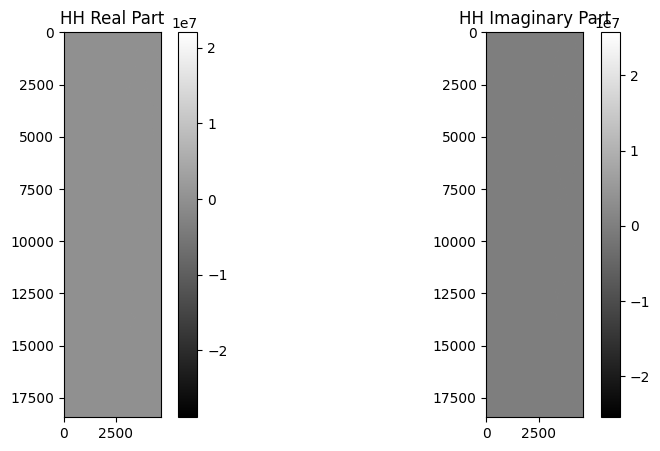

In [ ]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

# Open the PALSAR file
palsar = gdal.Open('/content/drive/MyDrive/ALPSRP181560370-H1.1__A/VOL-ALPSRP181560370-H1.1__A')

# Dimensions of the ALOS PALSAR data (x, y, bands)
cols = palsar.RasterXSize
rows = palsar.RasterYSize
bands = palsar.RasterCount

print("Rows, Columns = ", rows, ",", cols)
print("bands =", bands)

# Read different bands
HH_data = palsar.GetRasterBand(1)
HV_data = palsar.GetRasterBand(2)

# Read bands as arrays
HH_arr = HH_data.ReadAsArray()
HV_arr = HV_data.ReadAsArray()

# Extract real and imaginary parts of HH and HV
HH_real = np.real(HH_arr)  # Using NumPy to extract the real part
HH_imag = np.imag(HH_arr)  # Using NumPy to extract the imaginary part

# Display the results (optional visualization)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('HH Real Part')
plt.imshow(HH_real, cmap='gray')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('HH Imaginary Part')
plt.imshow(HH_imag, cmap='gray')
plt.colorbar()

plt.show()


In [ ]:
HH_arr

array([[ 2.8025969e-45+8.03676770e-09j,  5.2593534e-41+1.40129846e-45j,
         1.4012985e-45+0.00000000e+00j, ...,
         8.0221694e+03-1.04896625e+05j,  2.6480435e+03-7.22739141e+04j,
        -7.4006422e+04+1.74797480e+04j],
       [-7.8195664e+04+7.45889375e+04j, -2.0029819e+03-4.82364570e+04j,
        -1.8172492e+04+8.18981875e+04j, ...,
        -1.5168456e+05-1.22990125e+05j,  5.5300531e+04-1.86697875e+05j,
         1.1144808e+05-2.10461094e+05j],
       [-4.9427043e+04+7.59389844e+04j, -5.2259039e+04+2.05877012e+04j,
        -5.2790727e+04+7.82992188e+04j, ...,
         8.9620266e+04-9.77799688e+04j,  4.7948145e+04-2.02148625e+05j,
         2.2515148e+05-1.55417172e+05j],
       ...,
       [ 3.4641829e+03+1.22754758e+05j, -1.7030658e+04+1.02889590e+04j,
        -1.8816336e+04-5.00395068e+03j, ...,
         2.1360980e+05-3.94264453e+04j,  1.4001909e+05-1.32927188e+05j,
        -1.5400575e+05+5.45264570e+04j],
       [-3.9450777e+04-8.24908203e+04j, -4.2329102e+04-7.33483516e+0

# Question 1

In [ ]:
from osgeo import gdal

# Open the Level 1.1 image
image = gdal.Open('/content/drive/MyDrive/ALPSRP181560370-H1.1__A/VOL-ALPSRP181560370-H1.1__A')

# Get dimensions
rows = image.RasterYSize
cols = image.RasterXSize
total_pixels = rows * cols

print(f"Rows: {rows}, Columns: {cols}")
print(f"Total Number of Pixels: {total_pixels}")


Rows: 18432, Columns: 4640
Total Number of Pixels: 85524480


In [ ]:
# Extract metadata
metadata = image.GetMetadata()
for key, value in metadata.items():
    print(f"{key}: {value}")


AZIMUTH_LOOKS: 1.0
PRODUCT_LEVEL: 1.1
RANGE_LOOKS: 1.0
SENSOR_BAND: L


# Question 3

In [ ]:
import numpy as np

# Read HH and HV bands
HH_band = image.GetRasterBand(1)
HV_band = image.GetRasterBand(2)

HH_array = HH_band.ReadAsArray()
HV_array = HV_band.ReadAsArray()

# Extract real and imaginary parts
HH_real = np.real(HH_array)
HH_imag = np.imag(HH_array)

HV_real = np.real(HV_array)
HV_imag = np.imag(HV_array)

# Display results
print("HH Real Part:\n", HH_real)
print("HH Imaginary Part:\n", HH_imag)
print("HV Real Part:\n", HV_real)
print("HV Imaginary Part:\n", HV_imag)


HH Real Part:
 [[ 2.8025969e-45  5.2593534e-41  1.4012985e-45 ...  8.0221694e+03
   2.6480435e+03 -7.4006422e+04]
 [-7.8195664e+04 -2.0029819e+03 -1.8172492e+04 ... -1.5168456e+05
   5.5300531e+04  1.1144808e+05]
 [-4.9427043e+04 -5.2259039e+04 -5.2790727e+04 ...  8.9620266e+04
   4.7948145e+04  2.2515148e+05]
 ...
 [ 3.4641829e+03 -1.7030658e+04 -1.8816336e+04 ...  2.1360980e+05
   1.4001909e+05 -1.5400575e+05]
 [-3.9450777e+04 -4.2329102e+04  1.1871337e+04 ...  2.6952725e+05
   2.3359623e+05 -5.3673500e+04]
 [-5.4362250e+04 -1.1911015e+04  4.9814590e+04 ...  5.7761133e+04
   2.0925327e+05  2.1611111e+04]]
HH Imaginary Part:
 [[ 8.03676770e-09  1.40129846e-45  0.00000000e+00 ... -1.04896625e+05
  -7.22739141e+04  1.74797480e+04]
 [ 7.45889375e+04 -4.82364570e+04  8.18981875e+04 ... -1.22990125e+05
  -1.86697875e+05 -2.10461094e+05]
 [ 7.59389844e+04  2.05877012e+04  7.82992188e+04 ... -9.77799688e+04
  -2.02148625e+05 -1.55417172e+05]
 ...
 [ 1.22754758e+05  1.02889590e+04 -5.00395068